In [48]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from scipy.stats import f_oneway

### Read the file 

In [49]:
file_path= '/Users/miladebrahimian/Documents/Machine_learning_course/Datasets/CarPrice_Assignment.csv'
car_price_df= pd.read_csv(file_path)

In [50]:
car_price_df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [51]:
car_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## Handling categorical variables

In [52]:
categories_dict= {}

for column in car_price_df.select_dtypes(include=['object']).columns:
    categories_dict[column]= car_price_df[column].unique().tolist()

In [53]:
for key, value in categories_dict.items():
    print(f"{key}: {value}")

CarName: ['alfa-romero giulia', 'alfa-romero stelvio', 'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls', 'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)', 'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5', 'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300', 'dodge rampage', 'dodge challenger se', 'dodge d200', 'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)', 'dodge coronet custom', 'dodge dart custom', 'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc', 'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl', 'honda accord', 'honda civic 1300', 'honda prelude', 'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ', 'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk', 'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4', 'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs', 'mazda glc 4', 'mazda glc custom l', 'mazda glc custom', 'buick electra 225 custom', 'buick century luxus (sw)', 

### Handling cylindernumber and doornumber features 

In [54]:
# Create mapping dictionaries for 'cylindernumber' and 'doornumber'
cylinder_mapping = {'four': 4, 'six': 6, 'five': 5, 'three': 3, 'twelve': 12, 'two': 2, 'eight': 8}
door_mapping = {'two': 2, 'four': 4}

# Map the categorical values to integers
car_price_df['cylindernumber_int'] = car_price_df['cylindernumber'].map(cylinder_mapping)
car_price_df['doornumber_int'] = car_price_df['doornumber'].map(door_mapping)


## Undertaking Integer-encoding for other categorical variables 

In [55]:
# Initialize a dictionary to store the mappings
mapping_dict = {}

# List of columns to encode
columns_to_encode = [
    'CarName', 'fueltype', 'aspiration', 'carbody', 
    'drivewheel', 'enginelocation', 'enginetype', 
    'fuelsystem'
]

# Initialize LabelEncoder
le = LabelEncoder()

# Loop through each column and encode it
for column in columns_to_encode:
    car_price_df[column + '_int'] = le.fit_transform(car_price_df[column])
    # Store the mapping
    mapping_dict[column] = dict(zip(le.classes_, le.transform(le.classes_)))

# Drop the old columns
car_price_df.drop(columns_to_encode, axis=1, inplace=True)


In [56]:
for key, value in mapping_dict.items():
    print(f"{key}: {value}")

CarName: {'Nissan versa': 0, 'alfa-romero Quadrifoglio': 1, 'alfa-romero giulia': 2, 'alfa-romero stelvio': 3, 'audi 100 ls': 4, 'audi 100ls': 5, 'audi 4000': 6, 'audi 5000': 7, 'audi 5000s (diesel)': 8, 'audi fox': 9, 'bmw 320i': 10, 'bmw x1': 11, 'bmw x3': 12, 'bmw x4': 13, 'bmw x5': 14, 'bmw z4': 15, 'buick century': 16, 'buick century luxus (sw)': 17, 'buick century special': 18, 'buick electra 225 custom': 19, 'buick opel isuzu deluxe': 20, 'buick regal sport coupe (turbo)': 21, 'buick skyhawk': 22, 'buick skylark': 23, 'chevrolet impala': 24, 'chevrolet monte carlo': 25, 'chevrolet vega 2300': 26, 'dodge challenger se': 27, 'dodge colt (sw)': 28, 'dodge colt hardtop': 29, 'dodge coronet custom': 30, 'dodge coronet custom (sw)': 31, 'dodge d200': 32, 'dodge dart custom': 33, 'dodge monaco (sw)': 34, 'dodge rampage': 35, 'honda accord': 36, 'honda accord cvcc': 37, 'honda accord lx': 38, 'honda civic': 39, 'honda civic (auto)': 40, 'honda civic 1300': 41, 'honda civic 1500 gl': 42,

In [57]:
car_price_df.drop(['cylindernumber','doornumber' ], axis=1, inplace=True)

In [58]:
car_price_df.drop(['car_ID' ], axis=1, inplace=True)

In [59]:
car_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   symboling           205 non-null    int64  
 1   wheelbase           205 non-null    float64
 2   carlength           205 non-null    float64
 3   carwidth            205 non-null    float64
 4   carheight           205 non-null    float64
 5   curbweight          205 non-null    int64  
 6   enginesize          205 non-null    int64  
 7   boreratio           205 non-null    float64
 8   stroke              205 non-null    float64
 9   compressionratio    205 non-null    float64
 10  horsepower          205 non-null    int64  
 11  peakrpm             205 non-null    int64  
 12  citympg             205 non-null    int64  
 13  highwaympg          205 non-null    int64  
 14  price               205 non-null    float64
 15  cylindernumber_int  205 non-null    int64  
 16  doornumb

### Identify continuous variables based on number of unique values

In [60]:
# Print each column name and the first 5 values
for column in car_price_df.columns:
    print(f"{column}:")
    print(car_price_df[column].head(10).tolist())
    print()

symboling:
[3, 3, 1, 2, 2, 2, 1, 1, 1, 0]

wheelbase:
[88.6, 88.6, 94.5, 99.8, 99.4, 99.8, 105.8, 105.8, 105.8, 99.5]

carlength:
[168.8, 168.8, 171.2, 176.6, 176.6, 177.3, 192.7, 192.7, 192.7, 178.2]

carwidth:
[64.1, 64.1, 65.5, 66.2, 66.4, 66.3, 71.4, 71.4, 71.4, 67.9]

carheight:
[48.8, 48.8, 52.4, 54.3, 54.3, 53.1, 55.7, 55.7, 55.9, 52.0]

curbweight:
[2548, 2548, 2823, 2337, 2824, 2507, 2844, 2954, 3086, 3053]

enginesize:
[130, 130, 152, 109, 136, 136, 136, 136, 131, 131]

boreratio:
[3.47, 3.47, 2.68, 3.19, 3.19, 3.19, 3.19, 3.19, 3.13, 3.13]

stroke:
[2.68, 2.68, 3.47, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4]

compressionratio:
[9.0, 9.0, 9.0, 10.0, 8.0, 8.5, 8.5, 8.5, 8.3, 7.0]

horsepower:
[111, 111, 154, 102, 115, 110, 110, 110, 140, 160]

peakrpm:
[5000, 5000, 5000, 5500, 5500, 5500, 5500, 5500, 5500, 5500]

citympg:
[21, 21, 19, 24, 18, 19, 19, 19, 17, 16]

highwaympg:
[27, 27, 26, 30, 22, 25, 25, 25, 20, 22]

price:
[13495.0, 16500.0, 16500.0, 13950.0, 17450.0, 15250.0, 17710.

# feature scaling 

In [61]:
# continuous variables
continuous_columns = [
    'wheelbase', 'carlength', 'carwidth', 'carheight', 
    'curbweight', 'enginesize', 'boreratio', 'stroke', 
    'compressionratio', 'horsepower', 'peakrpm', 
    'citympg', 'highwaympg'
]


# Apply StandardScaler to continuous variables
scaler = StandardScaler()
car_price_df[continuous_columns] = scaler.fit_transform(car_price_df[continuous_columns])


In [62]:
# Print each column name and the first 5 values
for column in car_price_df.columns:
    print(f"{column}:")
    print(car_price_df[column].head(15).tolist())
    print()

symboling:
[3, 3, 1, 2, 2, 2, 1, 1, 1, 0, 2, 0, 0, 0, 1]

wheelbase:
[-1.6907718018201774, -1.6907718018201774, -0.7085958764076113, 0.17369775150537034, 0.1071095531723165, 0.17369775150537034, 1.1725207265011992, 1.1725207265011992, 1.1725207265011992, 0.12375660275557937, 0.40675644567106467, 0.40675644567106467, 0.40675644567106467, 0.40675644567106467, 0.7896385860861319]

carlength:
[-0.42652146835701304, -0.42652146835701304, -0.23151304680543727, 0.2072559016856128, 0.2072559016856128, 0.26413335797149096, 1.5154373962607788, 1.5154373962607788, 1.5154373962607788, 0.3372615160533307, 0.22350660348157897, 0.22350660348157897, 0.22350660348157897, 0.22350660348157897, 1.214799413035431]

carwidth:
[-0.8447823517277104, -0.8447823517277104, -0.19056612143668694, 0.1365419937088248, 0.23000145517897197, 0.18327172444389506, 2.566487991932618, 2.566487991932618, 2.566487991932618, 0.9309474162050657, -0.5176742365821987, -0.5176742365821987, -0.5176742365821987, -0.5176742365821987

## Feature Selection for continuous variables

conducting the initial Exploratory Data Analysis (EDA) to understand the relationships between features and the target variable.

Correlation Matrix for Continuous Variables
We can start by calculating the correlation matrix for the continuous variables and the target variable price.


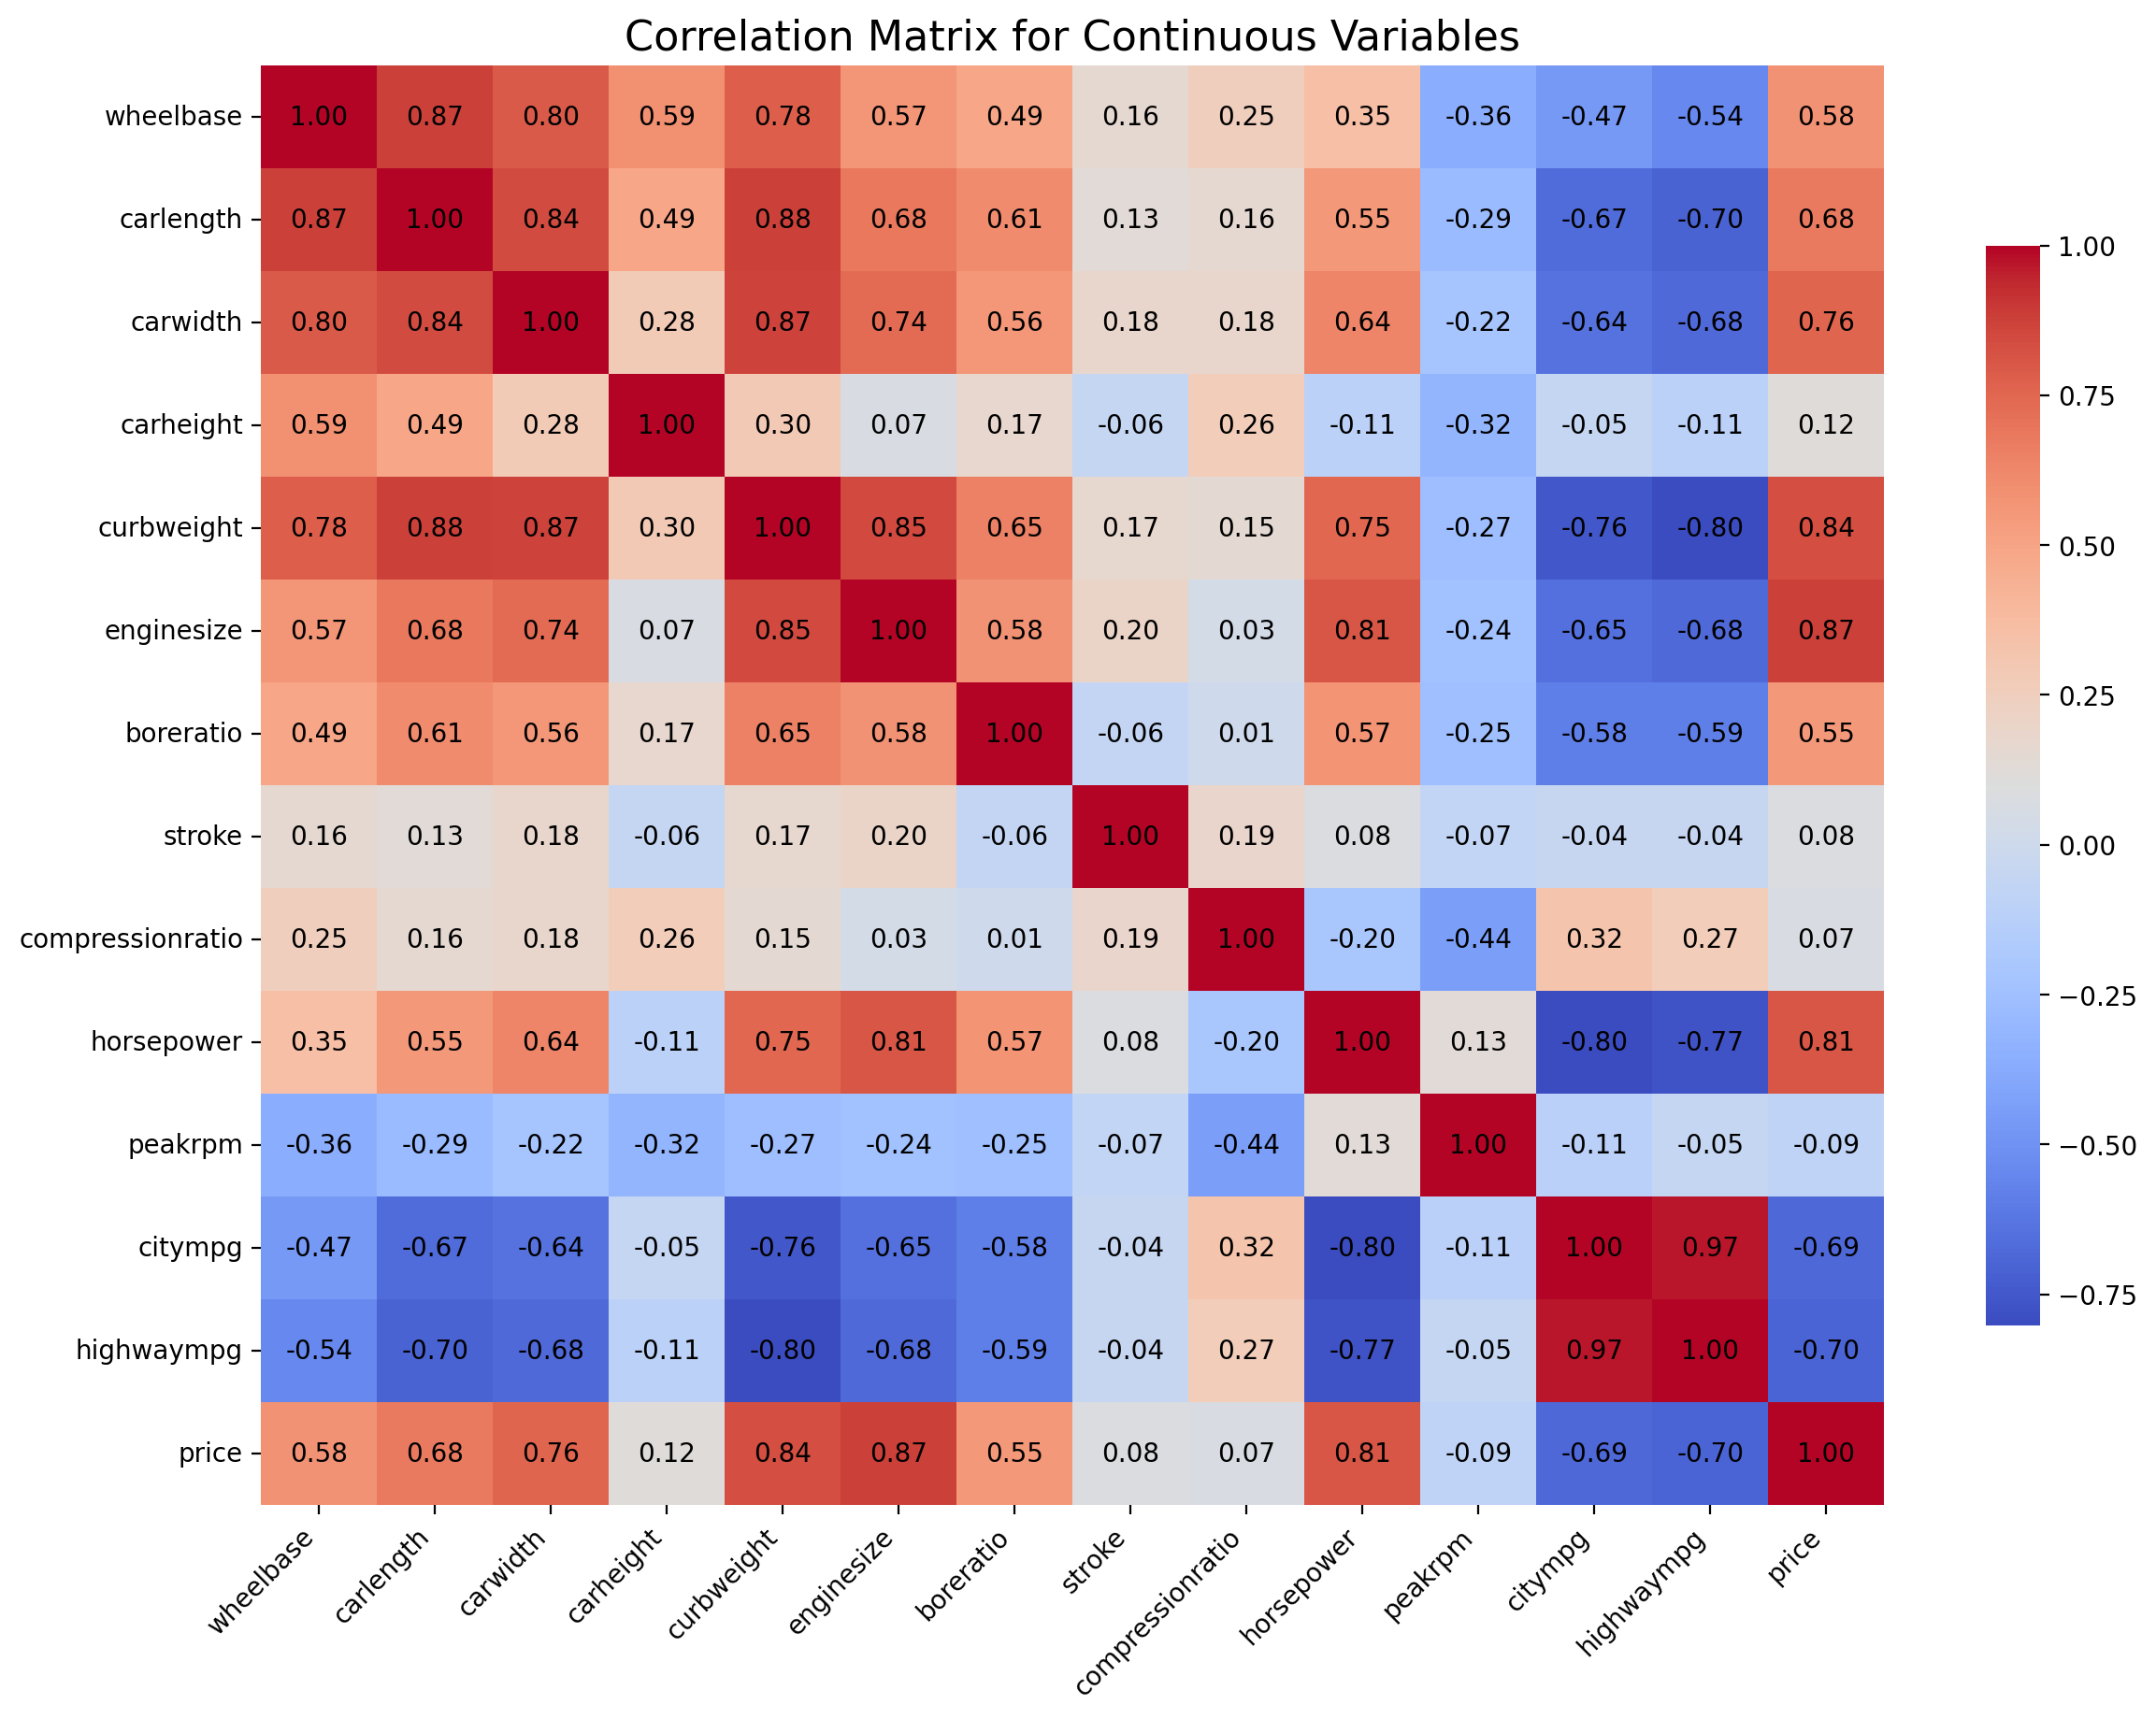

In [63]:
# List of continuous variables
continuous_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

# Compute the correlation matrix
corr_matrix = car_price_df[continuous_vars].corr()

# Plotting the correlation matrix with annotations
plt.figure(figsize=(14, 10), dpi=200)
heatmap = sns.heatmap(corr_matrix, cmap='coolwarm', cbar_kws={"shrink": 0.75})

# Ensure annotations are visible by adjusting the ticks
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Loop over data dimensions and create text annotations.
for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        text = heatmap.text(j+0.5, i+0.5, f"{corr_matrix.iloc[i, j]:.2f}",
                           ha="center", va="center", color="black", fontsize=10)

plt.title('Correlation Matrix for Continuous Variables', fontsize=16)
plt.show()


To address multicollinearity and undertake feature selection, you can follow these steps:

#### Evaluate Multicollinearity:
Use Variance Inflation Factor (VIF) to identify which variables are contributing to multicollinearity.

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

continuous_vars_excluding_price= ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']

# Assuming df is your dataframe with continuous variables and 'Price' as the target variable
X = car_price_df[continuous_vars_excluding_price]

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)


             feature        VIF
0          wheelbase   7.340949
1          carlength   9.422999
2           carwidth   5.586367
3          carheight   2.205975
4         curbweight  16.413371
5         enginesize   6.658982
6          boreratio   2.103912
7             stroke   1.195781
8   compressionratio   2.175511
9         horsepower   8.247880
10           peakrpm   2.053763
11           citympg  27.128671
12        highwaympg  24.277439


#### Feature Selection Techniques:
There are various techniques to select the most relevant features. We'll use Recursive Feature Elimination (RFE) with a model that handles multicollinearity, such as Lasso Regression.

In [65]:
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import RFE

# Define the model
lasso = LassoCV()

# Perform RFE
selector = RFE(lasso, n_features_to_select=9)  # You can choose the number of features to select
selector = selector.fit(X, car_price_df['price'])

# Get the selected features
selected_features = X.columns[selector.support_]
print("Selected Features: ", selected_features)

Selected Features:  Index(['carwidth', 'carheight', 'curbweight', 'enginesize', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg'],
      dtype='object')


#### Refine the Model

Refine the model using only the selected features and re-evaluate multicollinearity if necessary.

In [66]:
# Use only selected features
X_selected = X[selected_features]

# Recalculate VIF for the selected features
vif_data_selected = pd.DataFrame()
vif_data_selected["feature"] = X_selected.columns
vif_data_selected["VIF"] = [variance_inflation_factor(X_selected.values, i) for i in range(len(X_selected.columns))]

print(vif_data_selected)


            feature        VIF
0          carwidth   4.121069
1         carheight   1.596225
2        curbweight  12.849885
3        enginesize   6.571079
4            stroke   1.132721
5  compressionratio   2.128897
6        horsepower   6.702740
7           peakrpm   1.882327
8           citympg   5.682411


curbweight has a high VIF, so except than this feature, I will choose the other features as my ultimate continuous variables 

In [67]:
Continuous_VIF_selected_variables= ['carwidth', 'carheight', 'enginesize', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg']

In [68]:
New_Continuous_variable_dataframe= car_price_df[Continuous_VIF_selected_variables]

In [69]:
New_Continuous_variable_dataframe

,carwidth,carheight,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg
0,-0.844782,-2.020417,0.074449,-1.839377,-0.288349,0.174483,-0.262960,-0.646553
1,-0.844782,-2.020417,0.074449,-1.839377,-0.288349,0.174483,-0.262960,-0.646553
2,-0.190566,-0.543527,0.604046,0.685946,-0.288349,1.264536,-0.262960,-0.953012
3,0.136542,0.235942,-0.431076,0.462183,-0.035973,-0.053668,0.787855,-0.186865
4,0.230001,0.235942,0.218885,0.462183,-0.540725,0.275883,0.787855,-1.106241
...,...,...,...,...,...,...,...,...
200,1.398245,0.728239,0.339248,-0.336970,-0.162161,0.250533,0.577692,-0.340094
201,1.351515,0.728239,0.339248,-0.336970,-0.364062,1.416637,0.367529,-0.953012
202,1.398245,0.728239,1.109571,-1.232021,-0.338824,0.757535,0.787855,-1.106241
203,1.398245,0.728239,0.435538,0.462183,3.244916,0.047732,-0.683286,0.119594


# Ultimate dataframe of selected continuous variables is: 

## New_Continuous_variable_dataframe

## Feature Selection for categorical variables

In [70]:
Categorical_variables= ['symboling', 'cylindernumber_int', 'doornumber_int', 'CarName_int', 'fueltype_int', 'aspiration_int', 'carbody_int', 'drivewheel_int', 'enginelocation_int', 'enginetype_int', 'fuelsystem_int']

### Statistical Tests

#### ANOVA F-test: 
Perform ANOVA F-test between each categorical variable and the target variable. This will help determine whether the means of different categories are significantly different.

In [71]:
from sklearn.feature_selection import f_classif

X = car_price_df[Categorical_variables]
y = car_price_df['price']

F, p_values = f_classif(X, y)
selected_features_anova = [Categorical_variables[i] for i in range(len(F)) if p_values[i] < 0.05]


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [72]:
selected_features_anova 

['cylindernumber_int',
 'doornumber_int',
 'aspiration_int',
 'carbody_int',
 'drivewheel_int',
 'enginelocation_int',
 'fuelsystem_int']

### Mutual Information

Mutual Information Regression: Calculate the mutual information between each categorical variable and the target variable to understand the dependency.

In [73]:
from sklearn.feature_selection import mutual_info_regression

mi = mutual_info_regression(X, y)
selected_features_mi = [Categorical_variables[i] for i in range(len(mi)) if mi[i] > 0.05]


In [74]:
selected_features_mi

['symboling',
 'cylindernumber_int',
 'aspiration_int',
 'carbody_int',
 'drivewheel_int',
 'enginetype_int',
 'fuelsystem_int']

### Recursive Feature Elimination (RFE)

Apply RFE with a simpler model (e.g., Linear Regression) to select important features.

In [75]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
rfe = RFE(model, n_features_to_select=5)
rfe = rfe.fit(X, y)
selected_features_rfe = [Categorical_variables[i] for i in range(len(rfe.support_)) if rfe.support_[i]]

In [76]:
selected_features_rfe

['cylindernumber_int',
 'doornumber_int',
 'aspiration_int',
 'drivewheel_int',
 'enginelocation_int']

#### Feature Importance from Tree-Based Models

Train a tree-based model like Random Forest or Gradient Boosting and use feature importances to select the most important categorical variables.

In [77]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X, y)
importances = model.feature_importances_
selected_features_rf = [Categorical_variables[i] for i in range(len(importances)) if importances[i] > 0.05]


In [78]:
selected_features_rf

['cylindernumber_int', 'CarName_int', 'drivewheel_int', 'fuelsystem_int']

#### Combining Results

Combine the results from different methods to select the most relevant features.

In [79]:
selected_features = set(selected_features_anova) | set(selected_features_mi) | set(selected_features_rfe) | set(selected_features_rf) 
selected_features = list(selected_features)

In [80]:
selected_features

['drivewheel_int',
 'symboling',
 'enginetype_int',
 'CarName_int',
 'cylindernumber_int',
 'fuelsystem_int',
 'enginelocation_int',
 'aspiration_int',
 'doornumber_int',
 'carbody_int']

In [81]:
New_categorical_variable_dataframe= car_price_df[selected_features]

In [82]:
New_categorical_variable_dataframe

,drivewheel_int,symboling,enginetype_int,CarName_int,cylindernumber_int,fuelsystem_int,enginelocation_int,aspiration_int,doornumber_int,carbody_int
0,2,3,0,2,4,5,0,0,2,0
1,2,3,0,3,4,5,0,0,2,0
2,2,1,5,1,6,5,0,0,2,2
3,1,2,3,4,4,5,0,0,4,3
4,0,2,3,5,5,5,0,0,4,3
...,...,...,...,...,...,...,...,...,...,...
200,2,-1,3,139,4,5,0,0,4,3
201,2,-1,3,138,4,5,0,1,4,3
202,2,-1,5,140,6,5,0,0,4,3
203,2,-1,3,142,6,3,0,1,4,3


## Merging the dataframes together

In [83]:
# Step 1: Concatenate the two dataframes
merged_df = pd.concat([New_categorical_variable_dataframe, New_Continuous_variable_dataframe], axis=1)

# Step 2: Add the 'price' column from car_price_df as the last column
merged_df['price'] = car_price_df['price']

In [84]:
merged_df.head(5)

,drivewheel_int,symboling,enginetype_int,CarName_int,cylindernumber_int,fuelsystem_int,enginelocation_int,aspiration_int,doornumber_int,carbody_int,carwidth,carheight,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,price
0,2,3,0,2,4,5,0,0,2,0,-0.844782,-2.020417,0.074449,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,13495.0
1,2,3,0,3,4,5,0,0,2,0,-0.844782,-2.020417,0.074449,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,16500.0
2,2,1,5,1,6,5,0,0,2,2,-0.190566,-0.543527,0.604046,0.685946,-0.288349,1.264536,-0.262960,-0.953012,16500.0
3,1,2,3,4,4,5,0,0,4,3,0.136542,0.235942,-0.431076,0.462183,-0.035973,-0.053668,0.787855,-0.186865,13950.0
4,0,2,3,5,5,5,0,0,4,3,0.230001,0.235942,0.218885,0.462183,-0.540725,0.275883,0.787855,-1.106241,17450.0


# Our final dataframe is: 

### merged_df

# Data Visualisation

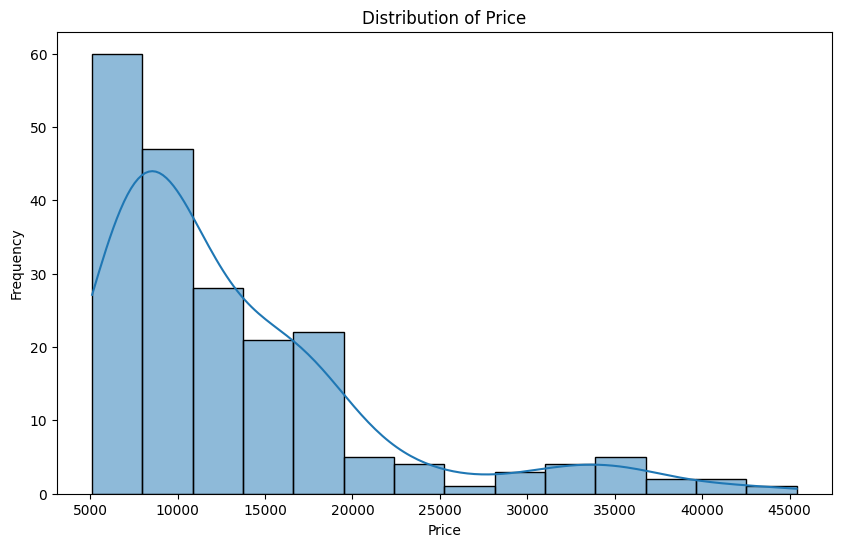

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['price'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


# Box Plots for Categorical Variables

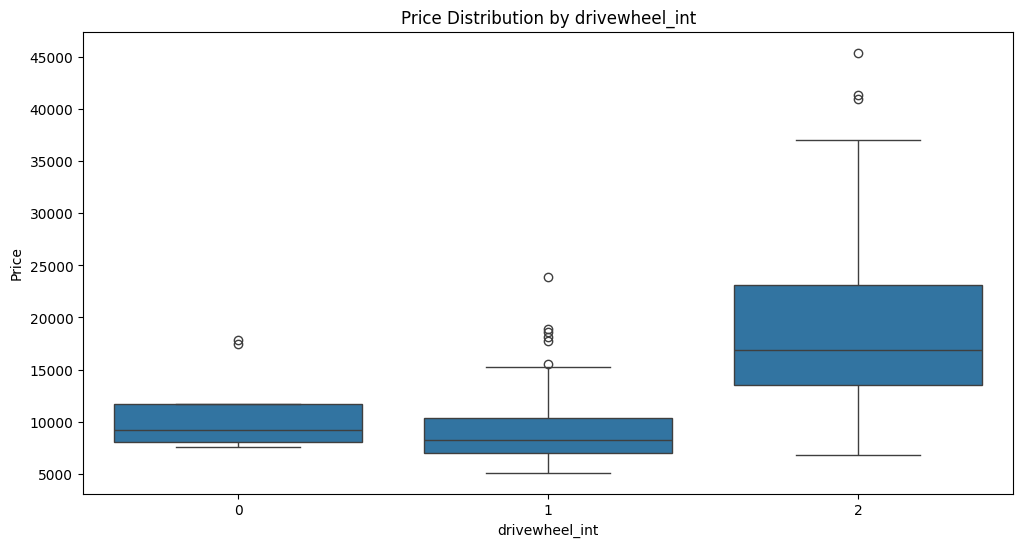

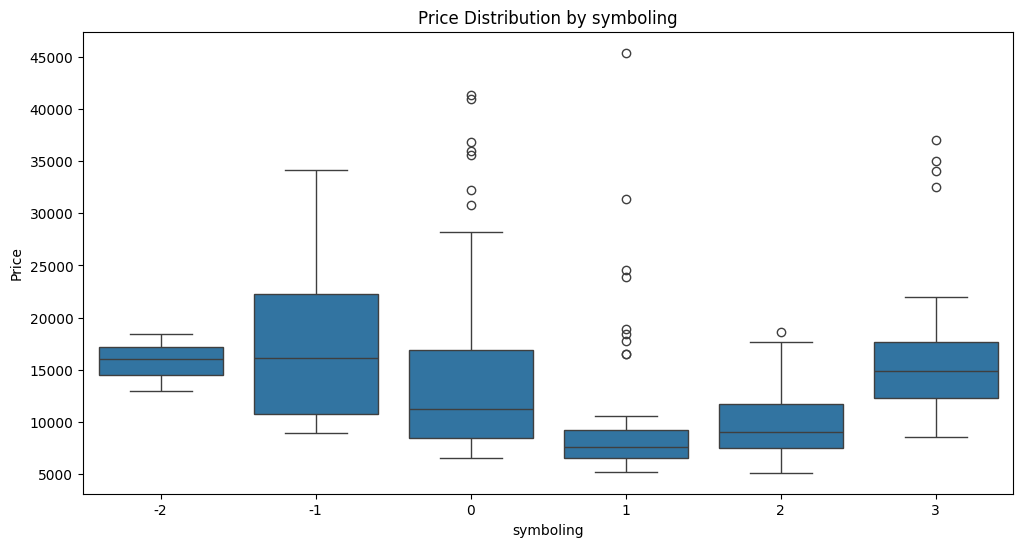

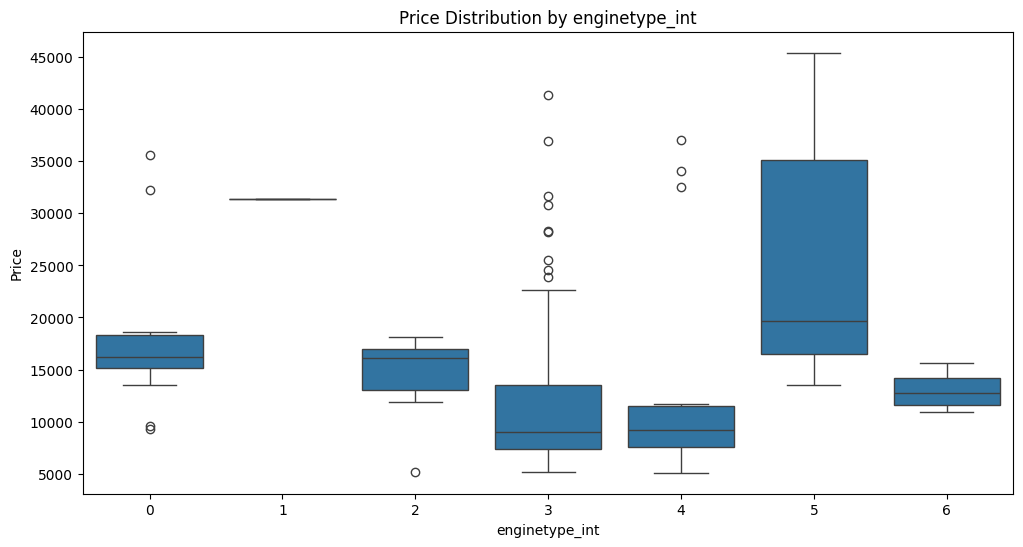

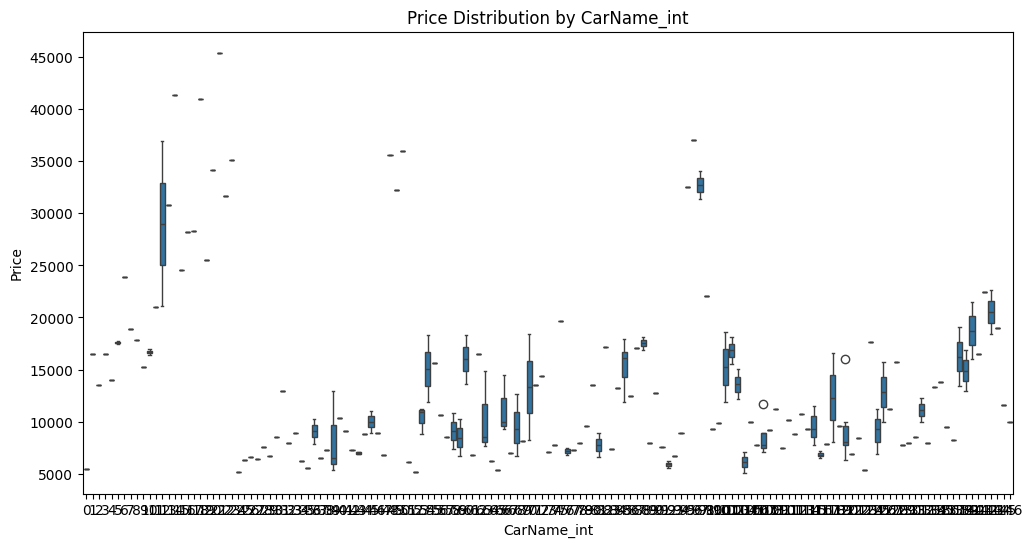

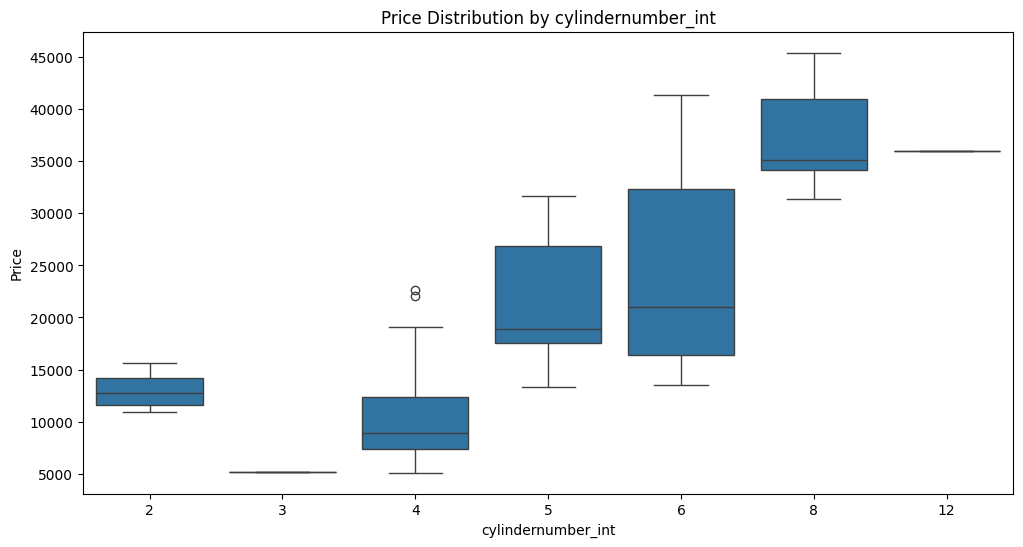

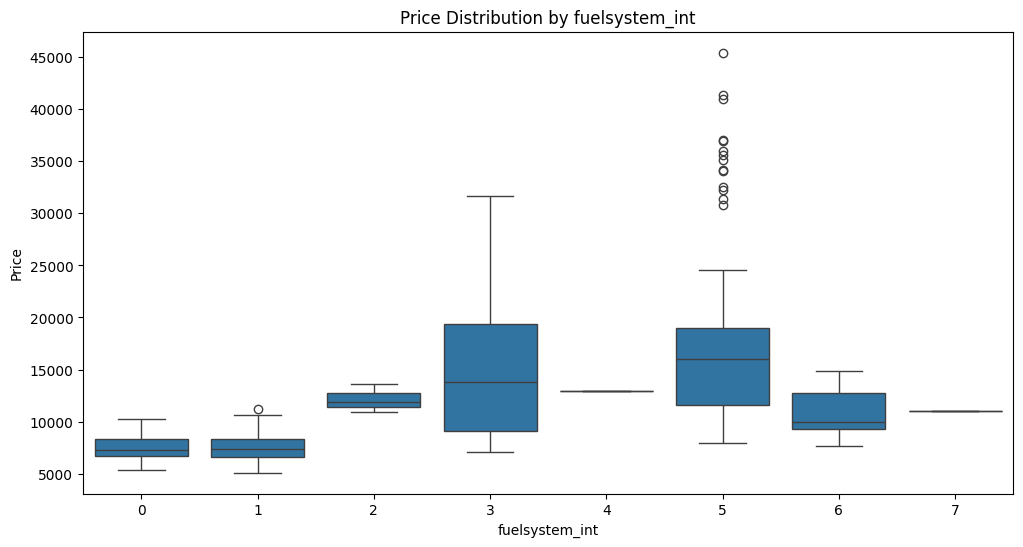

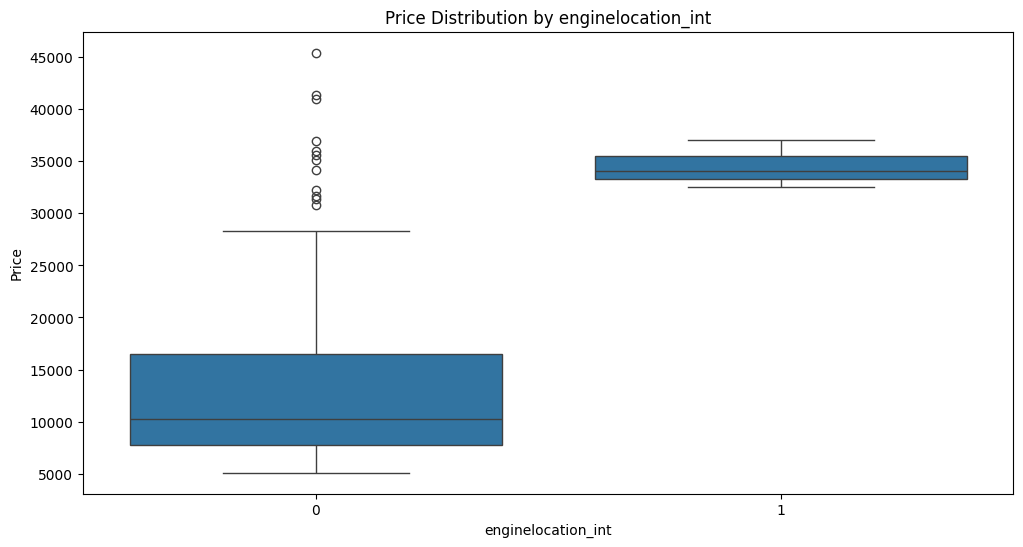

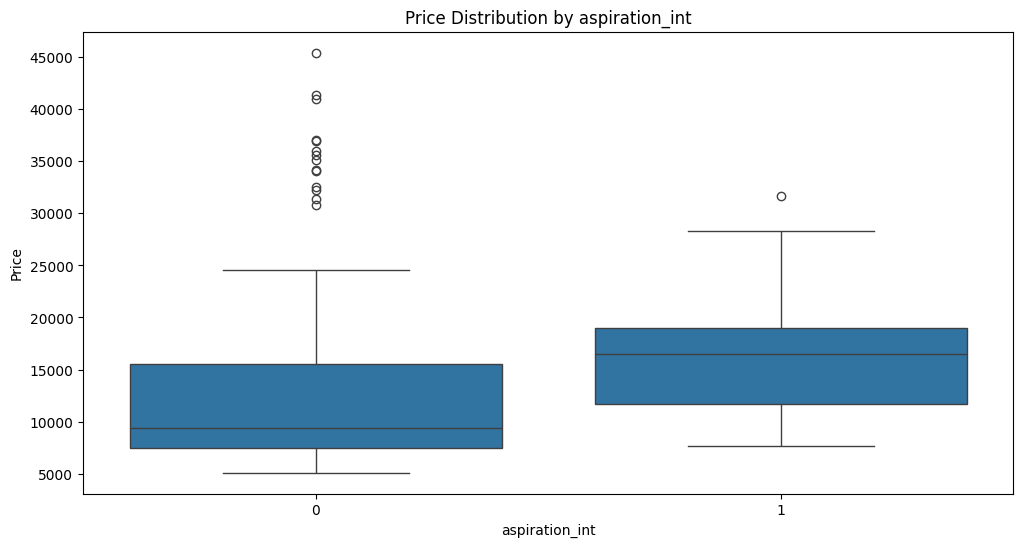

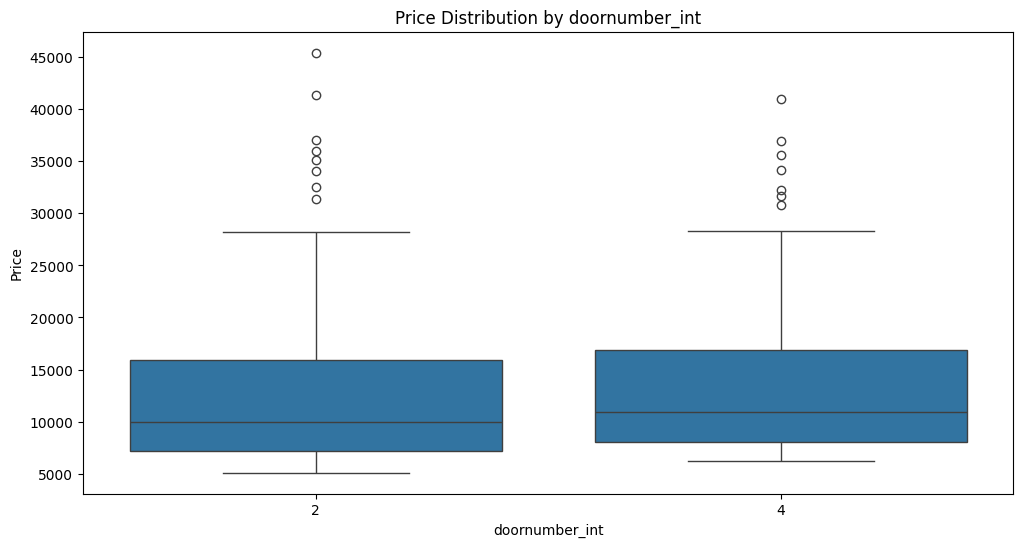

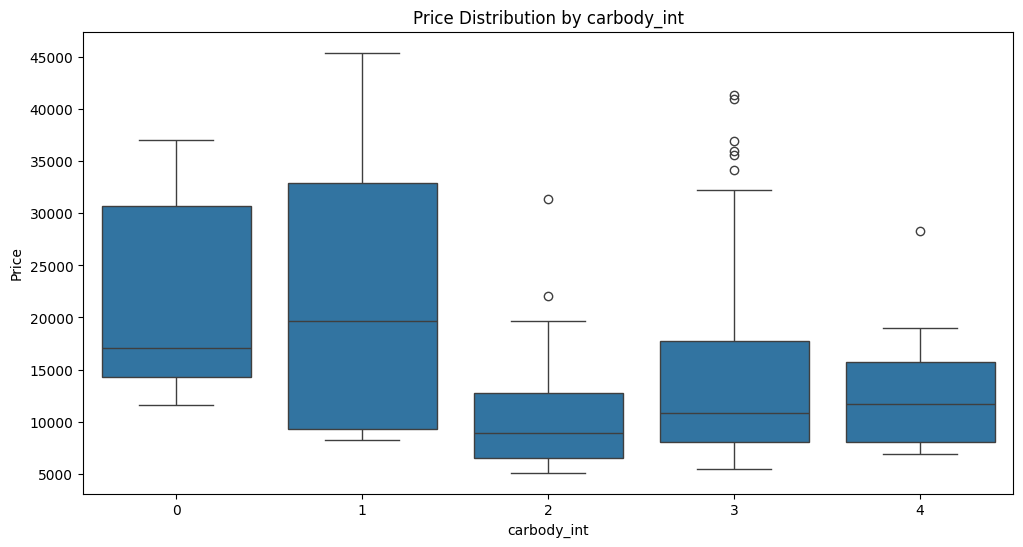

In [86]:
# Box plots for categorical variables
for cat_var in selected_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=cat_var, y='price', data=merged_df)
    plt.title(f'Price Distribution by {cat_var}')
    plt.xlabel(cat_var)
    plt.ylabel('Price')
    plt.show()

# Scatter Plots for Continuous Variables

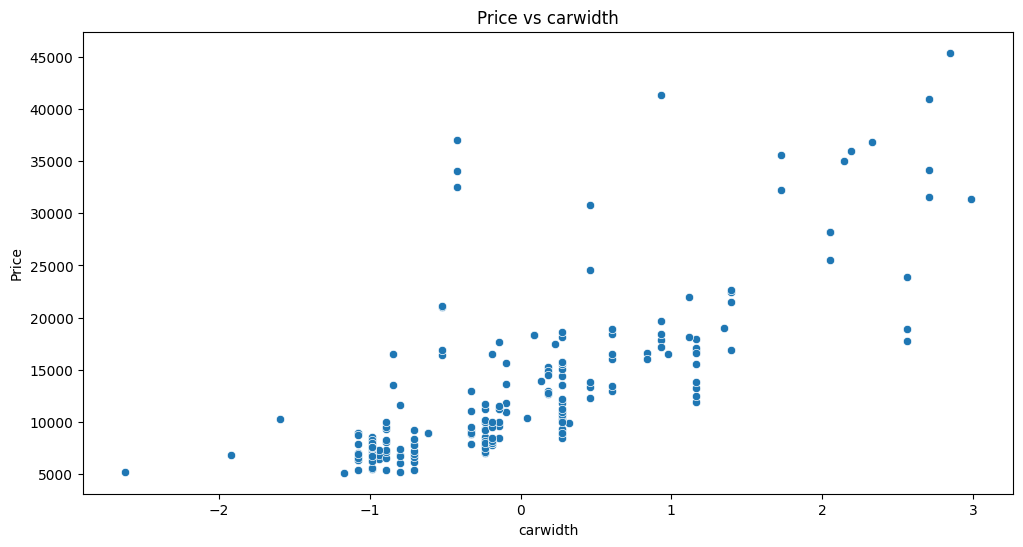

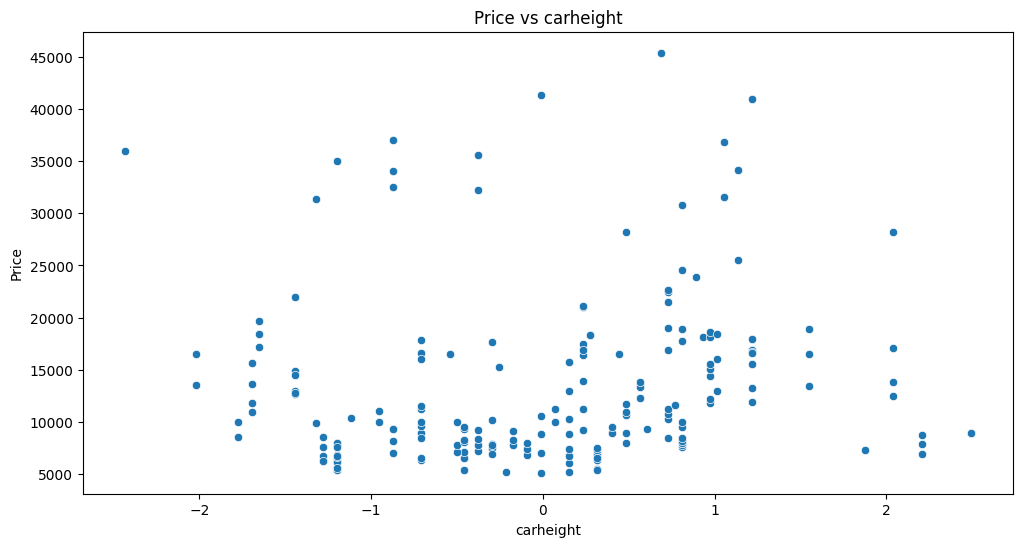

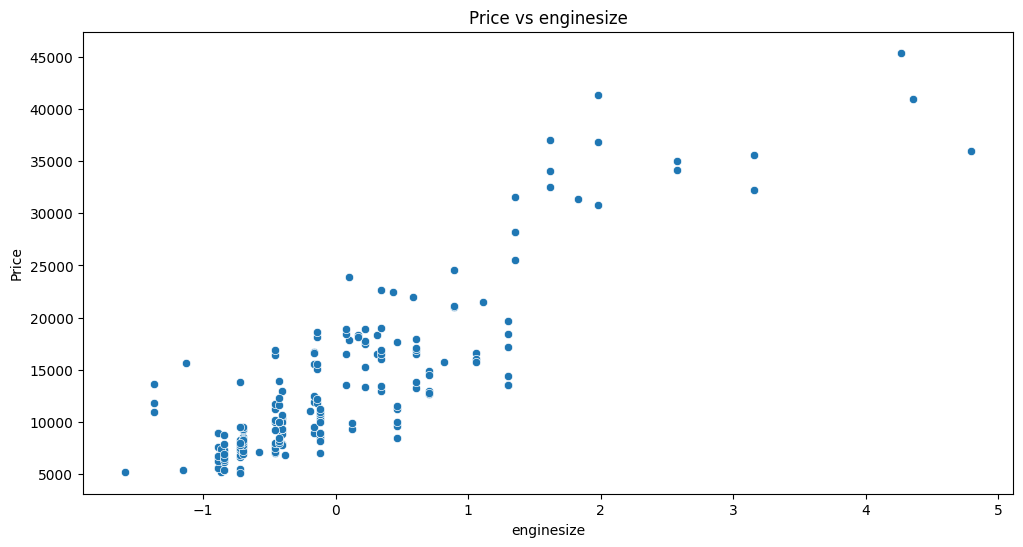

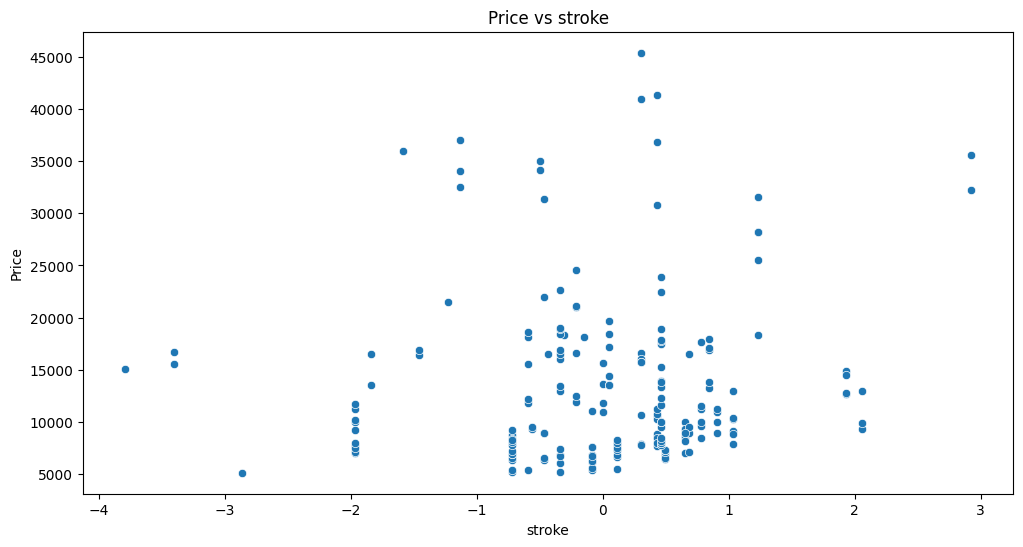

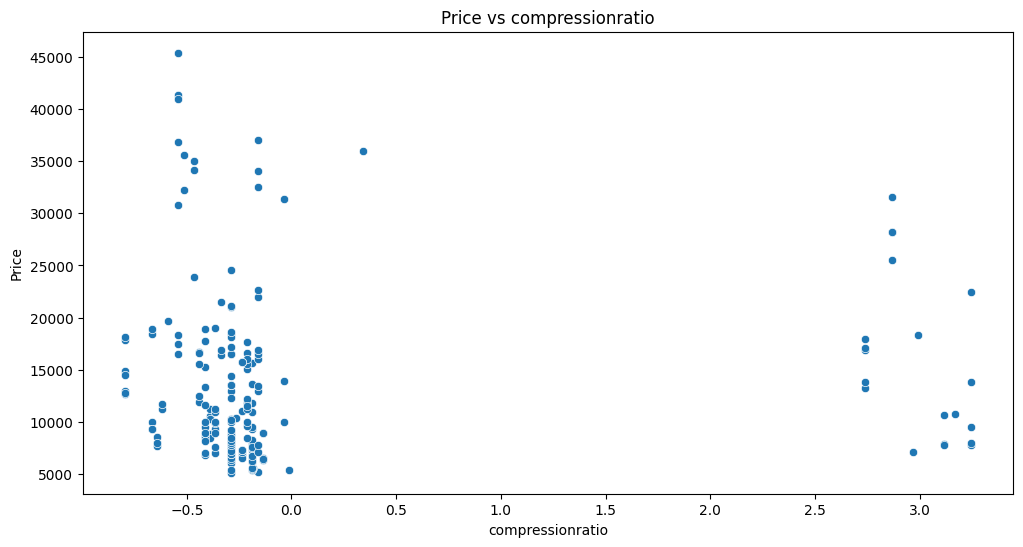

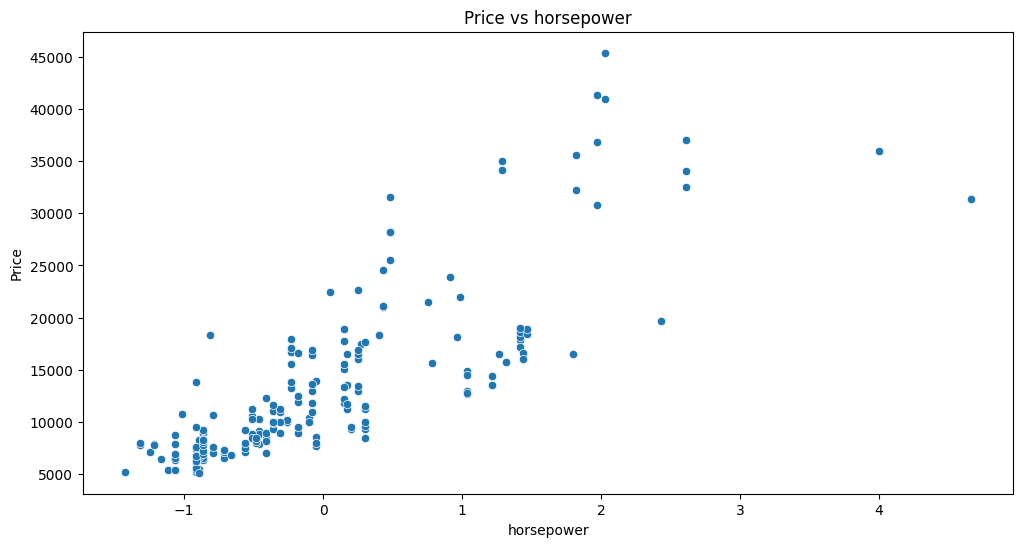

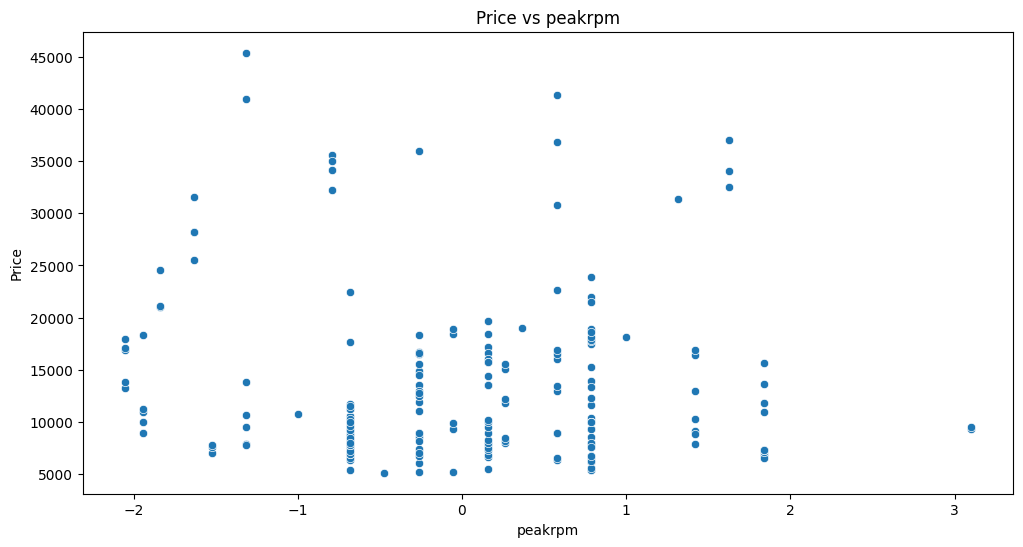

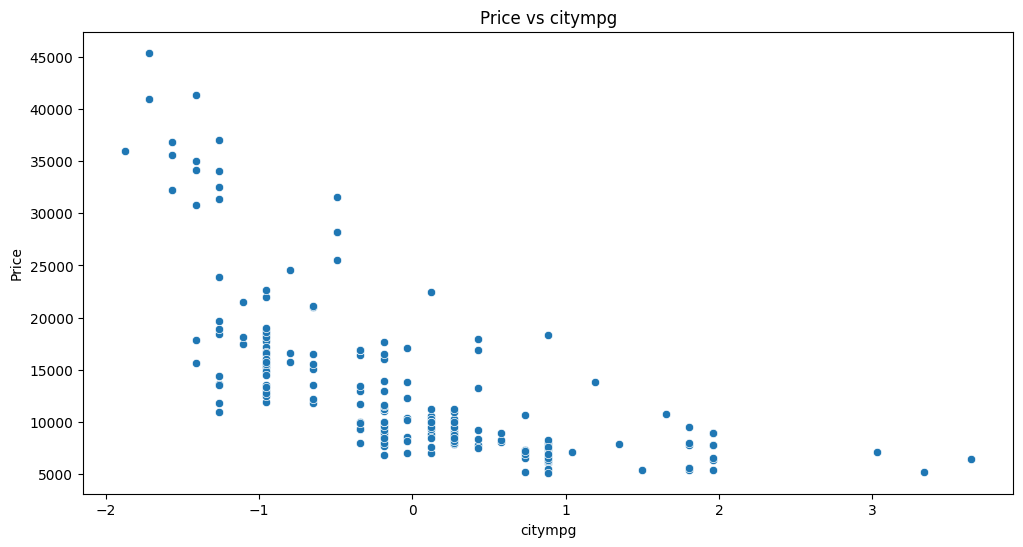

In [87]:
# Scatter plots for continuous variables
for cont_var in Continuous_VIF_selected_variables:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=cont_var, y='price', data=merged_df)
    plt.title(f'Price vs {cont_var}')
    plt.xlabel(cont_var)
    plt.ylabel('Price')
    plt.show()


# Pairplot for Continuous Variables

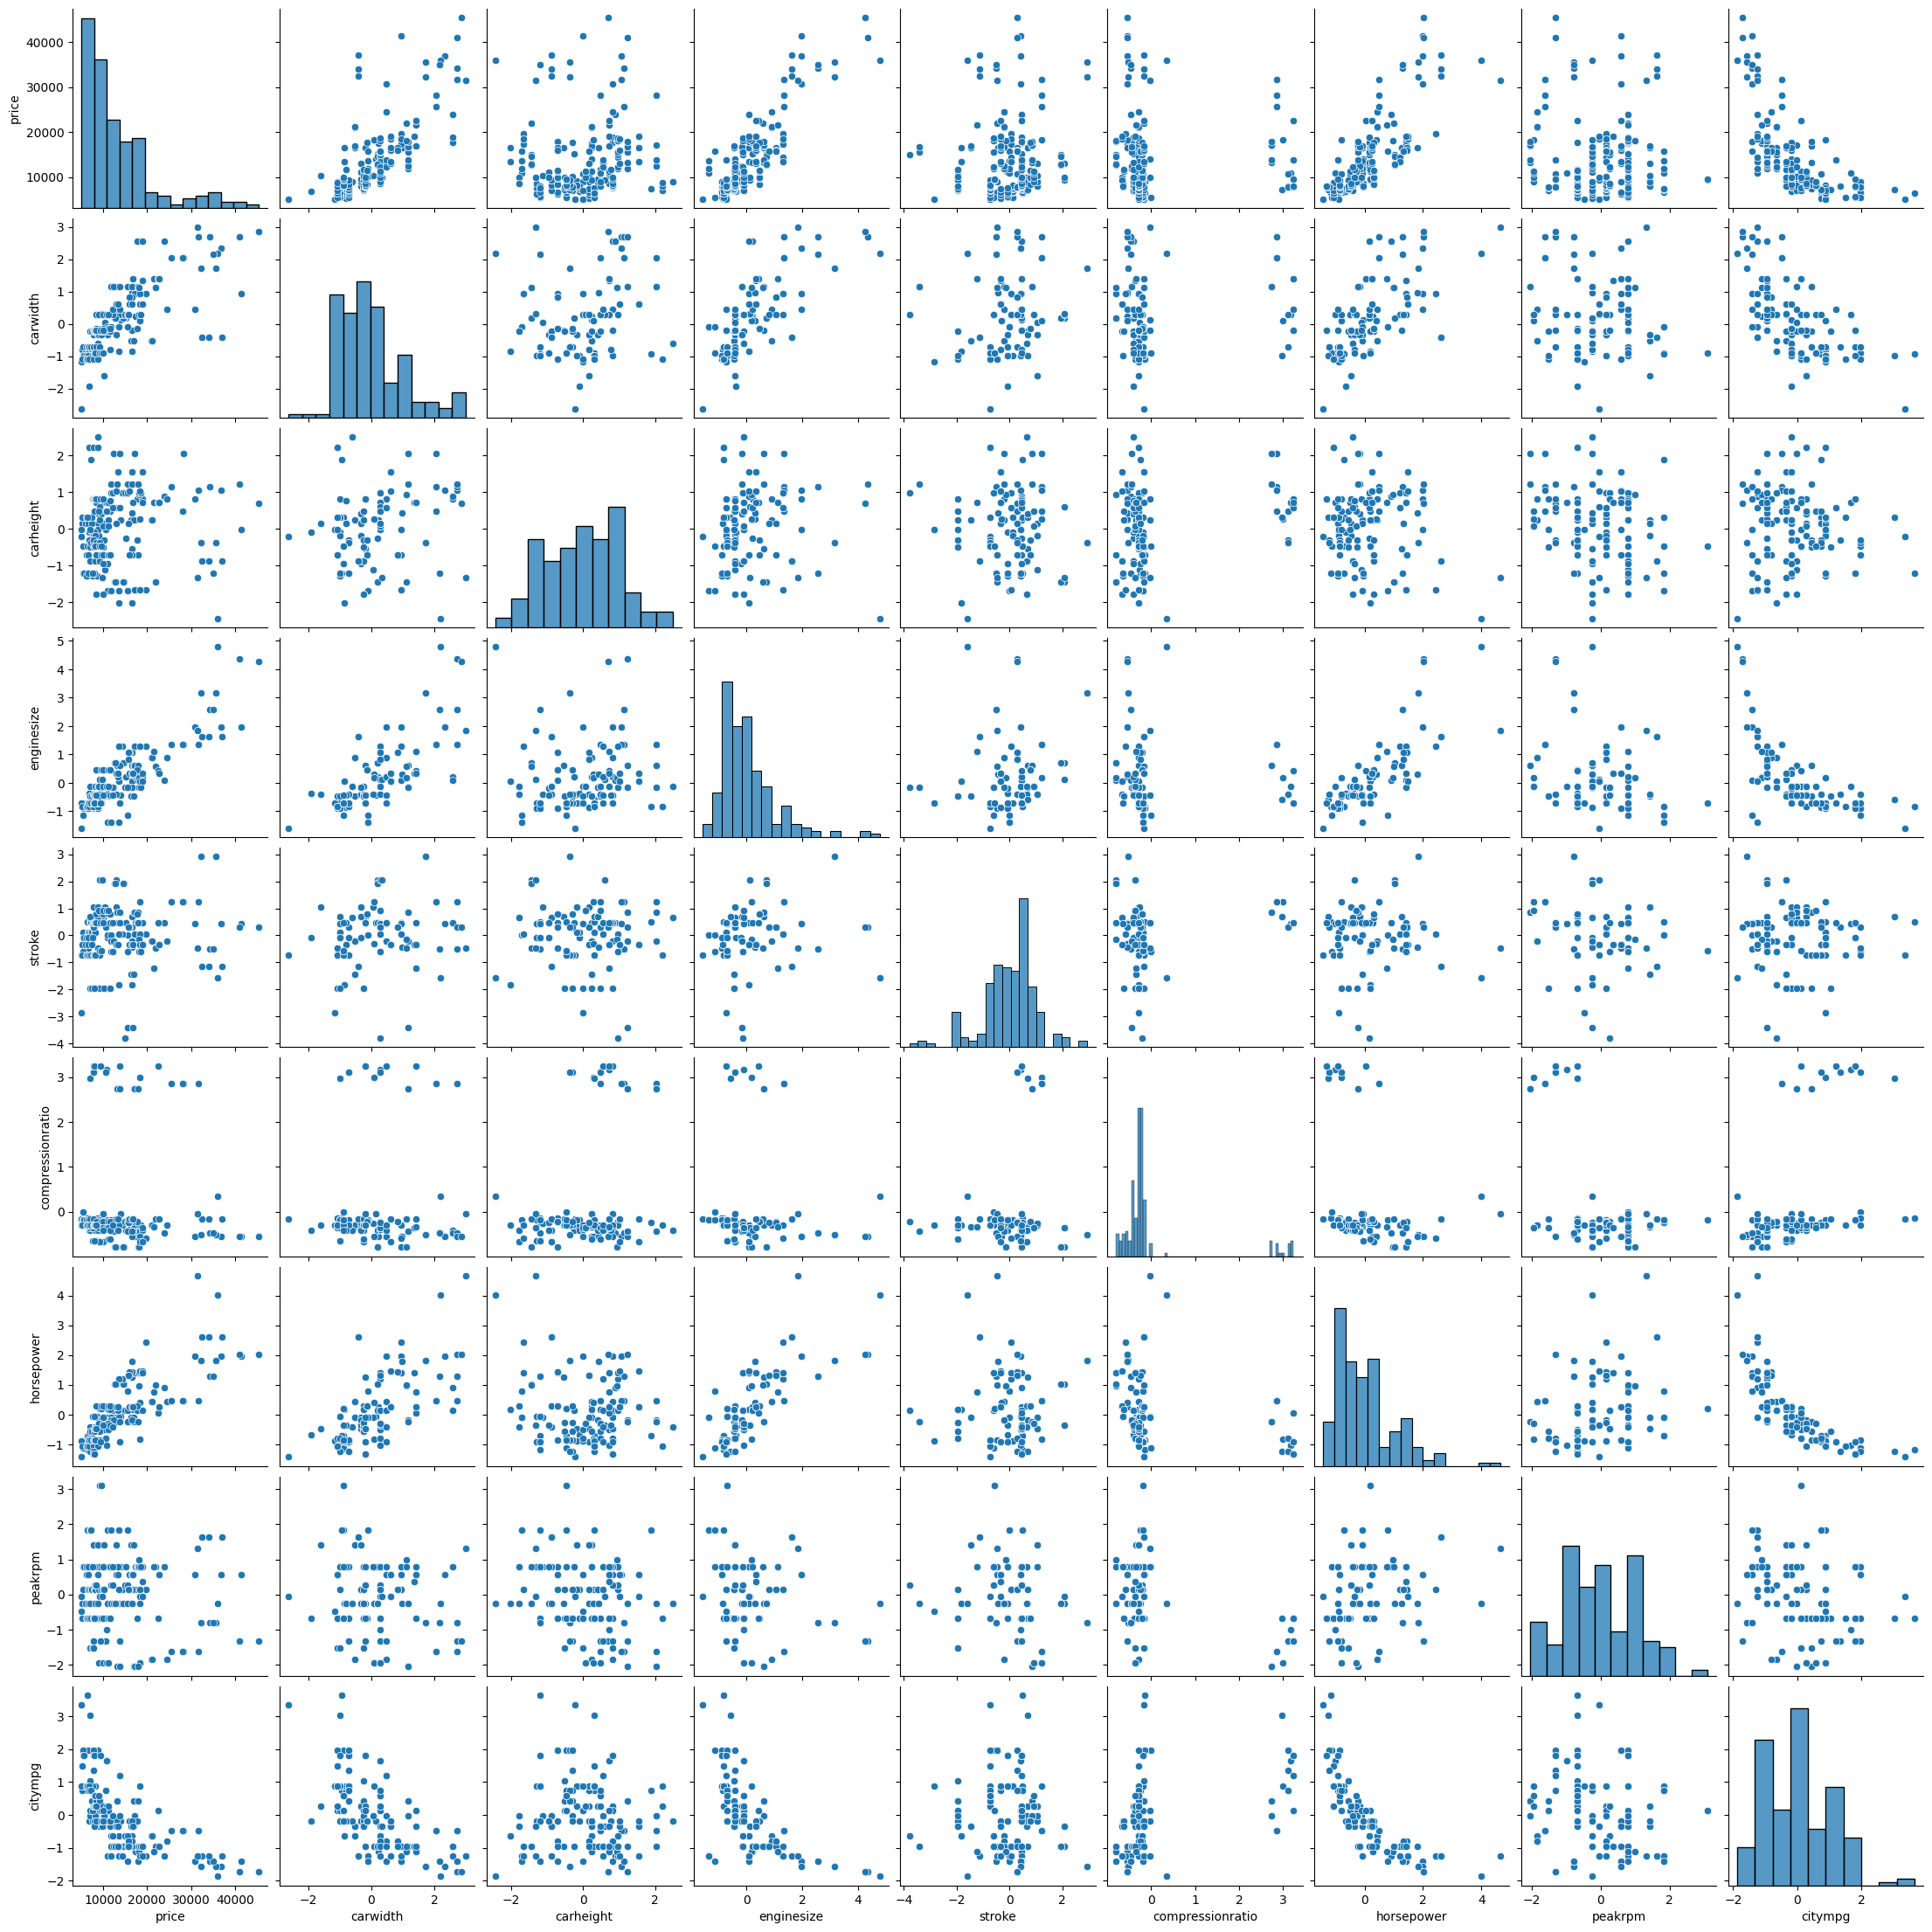

In [88]:
# Pairplot for continuous variables
sns.pairplot(merged_df[['price'] + Continuous_VIF_selected_variables])
plt.show()


# Our final dataframe is: 

### merged_df

In [89]:
len(merged_df.columns) #including the Price col

19

## Based on the plots, we delete some features from merged_df 

In [90]:
merged_df.columns

Index(['drivewheel_int', 'symboling', 'enginetype_int', 'CarName_int',
       'cylindernumber_int', 'fuelsystem_int', 'enginelocation_int',
       'aspiration_int', 'doornumber_int', 'carbody_int', 'carwidth',
       'carheight', 'enginesize', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'price'],
      dtype='object')

In [91]:
merged_df.drop([ 'CarName_int', 'doornumber_int', 'compressionratio', 'carheight', 'stroke' ], axis=1, inplace=True)

In [92]:
merged_df.columns

Index(['drivewheel_int', 'symboling', 'enginetype_int', 'cylindernumber_int',
       'fuelsystem_int', 'enginelocation_int', 'aspiration_int', 'carbody_int',
       'carwidth', 'enginesize', 'horsepower', 'peakrpm', 'citympg', 'price'],
      dtype='object')

In [93]:
len(merged_df.columns) #including the Price col

14

# Train/Test/Val split 

In [94]:
from sklearn.model_selection import train_test_split

X= merged_df.iloc[:, :-1] # all cols except the last one 
y= merged_df.iloc[:, -1] # the last col


X_train0, X_test, y_train0, y_test = train_test_split(X, y, test_size= 0.15, random_state= 42)
X_train1, X_val, y_train1, y_val   = train_test_split(X_train0, y_train0, test_size= 0.10, random_state= 42)


# Check the shapes to ensure correct splits
print("Training set shape:", X_train1.shape, y_train1.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (156, 13) (156,)
Validation set shape: (18, 13) (18,)
Test set shape: (31, 13) (31,)


# Our data sets so far: 

     Train set:  train1
     Val set:    val 
     Test set:   test 

# Coversion of pandas dataframe to Numpy arrays to be used in TensorFlow:

In [95]:
X_train1 = X_train1.values
X_val = X_val.values
X_test = X_test.values
y_train1 = y_train1.values
y_val = y_val.values
y_test = y_test.values

# Sequential model creation and Evaluation 

In [96]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError

# Defining the model:
model= Sequential() 

# Adding layers to the model:
model.add(Dense(64, input_dim= X_train1.shape[1], activation= 'relu')) #Input layer 
model.add(Dense(32, activation= 'relu')) 
model.add(Dense(1, activation= 'linear')) # output layer 

# compiling the model: 
model.compile(loss= 'mean_absolute_error',
              optimizer= 'sgd',
              metrics= [ RootMeanSquaredError(), "mean_absolute_error"])

### Training the model 

In [97]:
history= model.fit(X_train1, y_train1, validation_data= (X_val, y_val), epochs= 100, batch_size= 32)

Epoch 1/100
5/5 [==============================] - 0s 12ms/step - loss: 13277.7744 - root_mean_squared_error: 15336.3770 - mean_absolute_error: 13277.7744 - val_loss: 12320.0830 - val_root_mean_squared_error: 14472.5908 - val_mean_absolute_error: 12320.0830
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 13275.2256 - root_mean_squared_error: 15334.0225 - mean_absolute_error: 13275.2256 - val_loss: 12316.1943 - val_root_mean_squared_error: 14469.0146 - val_mean_absolute_error: 12316.1943
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 13268.6416 - root_mean_squared_error: 15327.3984 - mean_absolute_error: 13268.6416 - val_loss: 12302.5352 - val_root_mean_squared_error: 14456.4873 - val_mean_absolute_error: 12302.5352
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 13236.4385 - root_mean_squared_error: 15296.8652 - mean_absolute_error: 13236.4385 - val_loss: 12204.3486 - val_root_mean_squared_error: 14366.9033 - val_mea

The model's performance during training suggests that the loss is not improving significantly over the epochs, indicating potential issues.

steps to diagnose and improve the model's performance:


1. **Change Optimizer**: Try using a different optimizer such as `Adam` which often performs better than `SGD` for many tasks.

2. **Learning Rate Adjustment**: If sticking with `SGD`, experiment with different learning rates.

3. **Model Architecture**: Experiment with different architectures by adding more layers or neurons. Also, consider using dropout to avoid overfitting.

4. **Early Stopping**: Use early stopping to prevent overfitting and save the best model.


5. **Analyze the Learning Curves**: Plot the learning curves to understand if the model is overfitting or underfitting.

Epoch 1/100
5/5 [==============================] - 0s 11ms/step - loss: 13278.8018 - root_mean_squared_error: 15337.1895 - mean_absolute_error: 13278.8018 - val_loss: 12321.4131 - val_root_mean_squared_error: 14473.8818 - val_mean_absolute_error: 12321.4131
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 13277.6104 - root_mean_squared_error: 15336.3154 - mean_absolute_error: 13277.6104 - val_loss: 12320.4473 - val_root_mean_squared_error: 14472.9619 - val_mean_absolute_error: 12320.4473
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 13276.8477 - root_mean_squared_error: 15335.5723 - mean_absolute_error: 13276.8477 - val_loss: 12319.4238 - val_root_mean_squared_error: 14471.9717 - val_mean_absolute_error: 12319.4238
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 13275.5947 - root_mean_squared_error: 15334.3799 - mean_absolute_error: 13275.5947 - val_loss: 12318.2969 - val_root_mean_squared_error: 14470.8818 - val_mea

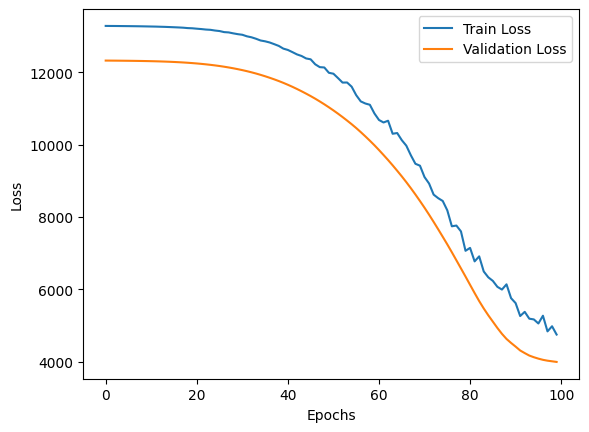

In [98]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
model = Sequential()
model.add(Dense(64, input_dim=X_train1.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

# Compile the model with Adam optimizer
model.compile(loss='mean_absolute_error',
              optimizer=Adam(learning_rate=0.001),
              metrics=[RootMeanSquaredError(), 'mean_absolute_error'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model
history = model.fit(X_train1, y_train1, validation_data=(X_val, y_val), epochs=100, batch_size=32, callbacks=[early_stopping])

# Plot learning curves
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Part 2: A model with 1 layer and neurons from 50 to 500 

In [99]:
loss_dict= {}

### First model with 50 units 

Epoch 1/100
5/5 [==============================] - 0s 10ms/step - loss: 13278.1689 - mean_absolute_error: 13278.1689 - val_loss: 12321.3398 - val_mean_absolute_error: 12321.3398
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 13277.5781 - mean_absolute_error: 13277.5781 - val_loss: 12320.7764 - val_mean_absolute_error: 12320.7764
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 13276.9873 - mean_absolute_error: 13276.9873 - val_loss: 12320.2012 - val_mean_absolute_error: 12320.2012
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 13276.3936 - mean_absolute_error: 13276.3936 - val_loss: 12319.6211 - val_mean_absolute_error: 12319.6211
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 13275.7969 - mean_absolute_error: 13275.7969 - val_loss: 12319.0322 - val_mean_absolute_error: 12319.0322
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 13275.1807 - mean_absolute_error: 13275.180

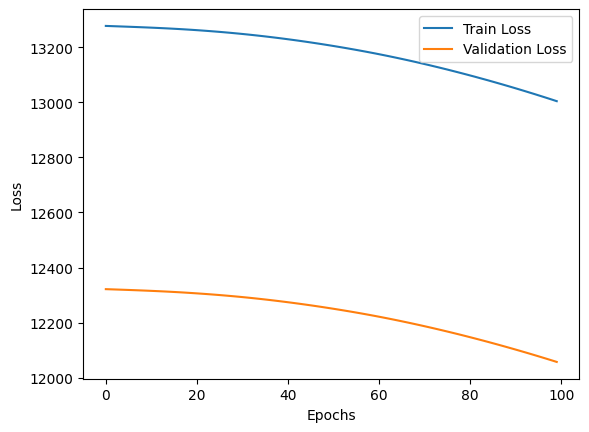

In [100]:
model= Sequential()

unit_nums= 50

model.add(Dense(unit_nums, input_dim= X_train1.shape[1], activation= 'relu')) 
model.add(Dense(1, activation= 'linear'))

# Compile the model with Adam optimizer
model.compile(loss='mean_absolute_error',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model
history = model.fit(X_train1, y_train1, validation_data=(X_val, y_val), epochs=100, batch_size=32, callbacks=[early_stopping])

#adding loss to the dict 
loss_dict[unit_nums]= history.history['loss'][-1]

# Plot learning curves
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [101]:
loss_dict

{50: 13004.6357421875}

### First model with 162 units 

Epoch 1/100
5/5 [==============================] - 0s 9ms/step - loss: 13277.6025 - mean_absolute_error: 13277.6025 - val_loss: 12320.6719 - val_mean_absolute_error: 12320.6719
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 13276.7051 - mean_absolute_error: 13276.7051 - val_loss: 12319.7969 - val_mean_absolute_error: 12319.7969
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 13275.7744 - mean_absolute_error: 13275.7744 - val_loss: 12318.8936 - val_mean_absolute_error: 12318.8936
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 13274.8281 - mean_absolute_error: 13274.8281 - val_loss: 12317.9395 - val_mean_absolute_error: 12317.9395
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 13273.7988 - mean_absolute_error: 13273.7988 - val_loss: 12316.9258 - val_mean_absolute_error: 12316.9258
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 13272.7168 - mean_absolute_error: 13272.7168

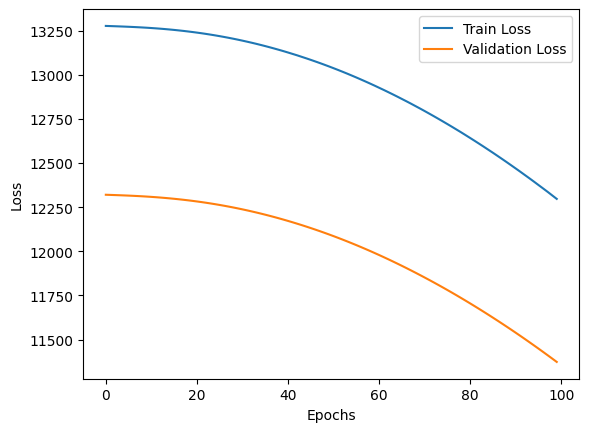

In [102]:
model= Sequential()

unit_nums= 162

model.add(Dense(unit_nums, input_dim= X_train1.shape[1], activation= 'relu')) 
model.add(Dense(1, activation= 'linear'))

# Compile the model with Adam optimizer
model.compile(loss='mean_absolute_error',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model
history = model.fit(X_train1, y_train1, validation_data=(X_val, y_val), epochs=100, batch_size=32, callbacks=[early_stopping])

#adding loss to the dict 
loss_dict[unit_nums]= history.history['loss'][-1]

# Plot learning curves
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [103]:
loss_dict

{50: 13004.6357421875, 162: 12297.2431640625}

Epoch 1/100
5/5 [==============================] - 0s 9ms/step - loss: 13277.3389 - mean_absolute_error: 13277.3389 - val_loss: 12320.2012 - val_mean_absolute_error: 12320.2012
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 13275.9404 - mean_absolute_error: 13275.9404 - val_loss: 12318.8398 - val_mean_absolute_error: 12318.8398
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 13274.5068 - mean_absolute_error: 13274.5068 - val_loss: 12317.4180 - val_mean_absolute_error: 12317.4180
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 13273.0029 - mean_absolute_error: 13273.0029 - val_loss: 12315.9004 - val_mean_absolute_error: 12315.9004
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 13271.3672 - mean_absolute_error: 13271.3672 - val_loss: 12314.2520 - val_mean_absolute_error: 12314.2520
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 13269.6025 - mean_absolute_error: 13269.6025

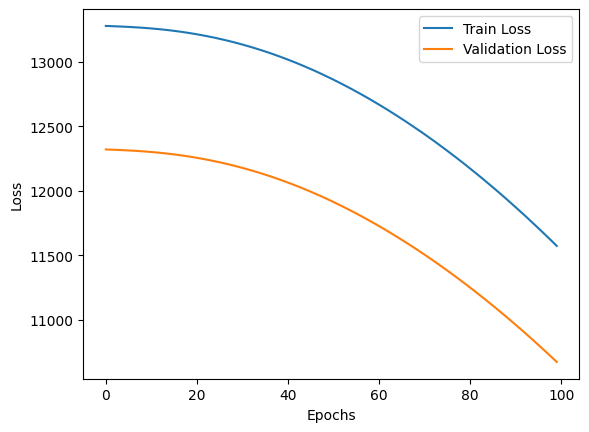

In [104]:
model= Sequential()

unit_nums= 274

model.add(Dense(unit_nums, input_dim= X_train1.shape[1], activation= 'relu')) 
model.add(Dense(1, activation= 'linear'))

# Compile the model with Adam optimizer
model.compile(loss='mean_absolute_error',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model
history = model.fit(X_train1, y_train1, validation_data=(X_val, y_val), epochs=100, batch_size=32, callbacks=[early_stopping])

#adding loss to the dict 
loss_dict[unit_nums]= history.history['loss'][-1]

# Plot learning curves
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [105]:
loss_dict

{50: 13004.6357421875, 162: 12297.2431640625, 274: 11572.59765625}

Epoch 1/100
5/5 [==============================] - 0s 9ms/step - loss: 13277.7588 - mean_absolute_error: 13277.7588 - val_loss: 12320.5479 - val_mean_absolute_error: 12320.5479
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 13276.2666 - mean_absolute_error: 13276.2666 - val_loss: 12319.0918 - val_mean_absolute_error: 12319.0918
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 13274.7393 - mean_absolute_error: 13274.7393 - val_loss: 12317.5488 - val_mean_absolute_error: 12317.5488
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 13273.0840 - mean_absolute_error: 13273.0840 - val_loss: 12315.8721 - val_mean_absolute_error: 12315.8721
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 13271.2568 - mean_absolute_error: 13271.2568 - val_loss: 12314.0137 - val_mean_absolute_error: 12314.0137
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 13269.2549 - mean_absolute_error: 13269.2549

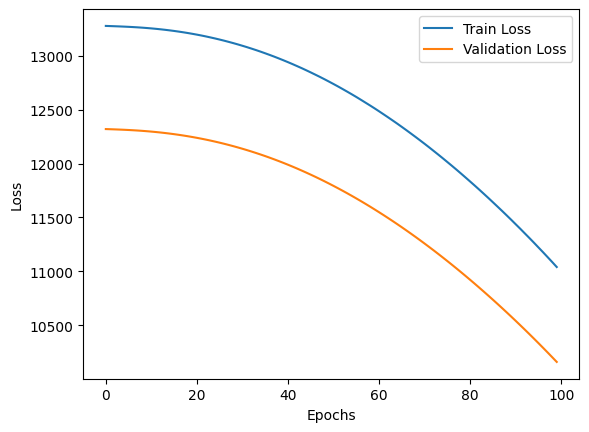

In [106]:
model= Sequential()

unit_nums= 386

model.add(Dense(unit_nums, input_dim= X_train1.shape[1], activation= 'relu')) 
model.add(Dense(1, activation= 'linear'))

# Compile the model with Adam optimizer
model.compile(loss='mean_absolute_error',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model
history = model.fit(X_train1, y_train1, validation_data=(X_val, y_val), epochs=100, batch_size=32, callbacks=[early_stopping])

#adding loss to the dict 
loss_dict[unit_nums]= history.history['loss'][-1]

# Plot learning curves
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/100
5/5 [==============================] - 0s 9ms/step - loss: 13277.9521 - mean_absolute_error: 13277.9521 - val_loss: 12320.5576 - val_mean_absolute_error: 12320.5576
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 13276.2744 - mean_absolute_error: 13276.2744 - val_loss: 12318.9482 - val_mean_absolute_error: 12318.9482
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 13274.5674 - mean_absolute_error: 13274.5674 - val_loss: 12317.2822 - val_mean_absolute_error: 12317.2822
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 13272.8057 - mean_absolute_error: 13272.8057 - val_loss: 12315.5039 - val_mean_absolute_error: 12315.5039
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 13270.8652 - mean_absolute_error: 13270.8652 - val_loss: 12313.5361 - val_mean_absolute_error: 12313.5361
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 13268.7363 - mean_absolute_error: 13268.7363

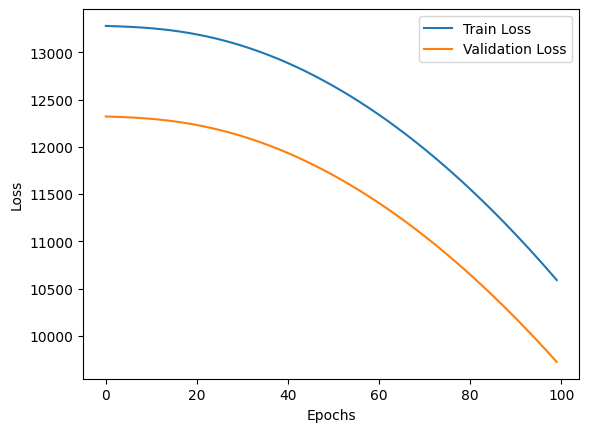

In [107]:
model= Sequential()

unit_nums= 500

model.add(Dense(unit_nums, input_dim= X_train1.shape[1], activation= 'relu')) 
model.add(Dense(1, activation= 'linear'))

# Compile the model with Adam optimizer
model.compile(loss='mean_absolute_error',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model
history = model.fit(X_train1, y_train1, validation_data=(X_val, y_val), epochs=100, batch_size=32, callbacks=[early_stopping])

#adding loss to the dict 
loss_dict[unit_nums]= history.history['loss'][-1]

# Plot learning curves
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [108]:
loss_dict

{50: 13004.6357421875,
 162: 12297.2431640625,
 274: 11572.59765625,
 386: 11040.4892578125,
 500: 10591.2744140625}

# Plotting the loss_dict 

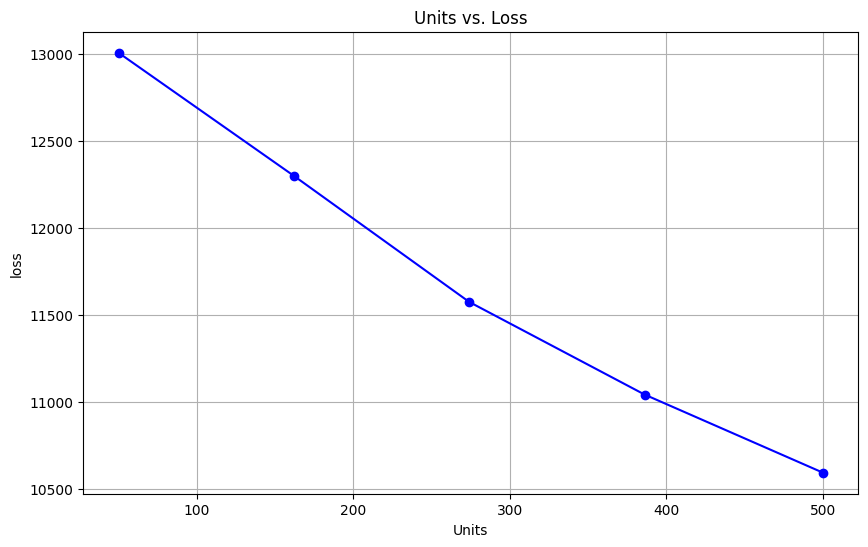

In [109]:
#Extracting keys and values:

x= list(loss_dict.keys())
y= list(loss_dict.values())

#plotting:

plt.figure(figsize=(10,6))
plt.plot(x,y,marker= 'o', linestyle= '-', color= 'b')
plt.title('Units vs. Loss')
plt.xlabel('Units')
plt.ylabel('loss')
plt.grid(True)
plt.show()

# Part 3: 

### networks with 100 units in each layer and num of layers is variable (1,2,5,7)



In [110]:
loss_dict_for_layers= {}

Epoch 1/100
5/5 [==============================] - 0s 10ms/step - loss: 13277.8975 - mean_absolute_error: 13277.8975 - val_loss: 12321.1514 - val_mean_absolute_error: 12321.1514
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 13277.2324 - mean_absolute_error: 13277.2324 - val_loss: 12320.5195 - val_mean_absolute_error: 12320.5195
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 13276.5674 - mean_absolute_error: 13276.5674 - val_loss: 12319.8857 - val_mean_absolute_error: 12319.8857
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 13275.8906 - mean_absolute_error: 13275.8906 - val_loss: 12319.2305 - val_mean_absolute_error: 12319.2305
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 13275.1953 - mean_absolute_error: 13275.1953 - val_loss: 12318.5352 - val_mean_absolute_error: 12318.5352
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 13274.4668 - mean_absolute_error: 13274.466

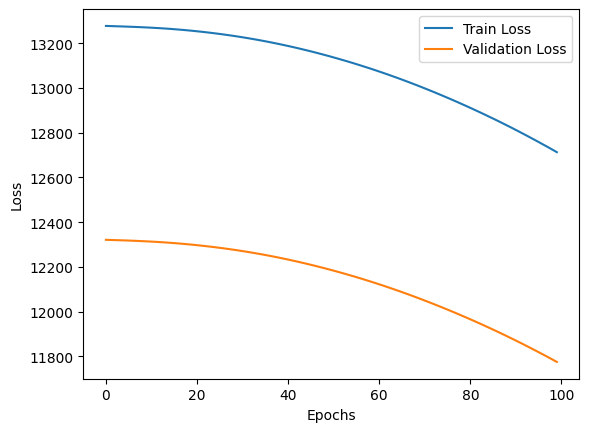

In [111]:
model= Sequential()

unit_nums= 100

model.add(Dense(unit_nums, input_dim= X_train1.shape[1], activation= 'relu')) 
model.add(Dense(1, activation= 'linear'))

# Compile the model with Adam optimizer
model.compile(loss='mean_absolute_error',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model
history = model.fit(X_train1, y_train1, validation_data=(X_val, y_val), epochs=100, batch_size=32, callbacks=[early_stopping])

#adding loss to the dict 
loss_dict_for_layers[1]= history.history['loss'][-1]

# Plot learning curves
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/100
5/5 [==============================] - 0s 10ms/step - loss: 13276.8174 - mean_absolute_error: 13276.8174 - val_loss: 12319.4033 - val_mean_absolute_error: 12319.4033
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 13275.1162 - mean_absolute_error: 13275.1162 - val_loss: 12317.7588 - val_mean_absolute_error: 12317.7588
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 13273.3174 - mean_absolute_error: 13273.3174 - val_loss: 12315.9072 - val_mean_absolute_error: 12315.9072
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 13271.2676 - mean_absolute_error: 13271.2676 - val_loss: 12313.6533 - val_mean_absolute_error: 12313.6533
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 13268.6846 - mean_absolute_error: 13268.6846 - val_loss: 12310.8057 - val_mean_absolute_error: 12310.8057
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 13265.4268 - mean_absolute_error: 13265.426

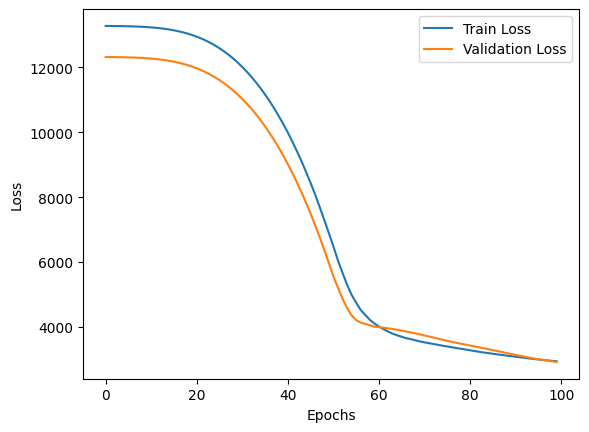

In [112]:
model= Sequential()

unit_nums= 100

model.add(Dense(unit_nums, input_dim= X_train1.shape[1], activation= 'relu'))
model.add(Dense(unit_nums, activation='relu'))
model.add(Dense(1, activation= 'linear'))

# Compile the model with Adam optimizer
model.compile(loss='mean_absolute_error',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model
history = model.fit(X_train1, y_train1, validation_data=(X_val, y_val), epochs=100, batch_size=32, callbacks=[early_stopping])

#adding loss to the dict 
loss_dict_for_layers[2]= history.history['loss'][-1]

# Plot learning curves
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/100
5/5 [==============================] - 0s 11ms/step - loss: 13277.9131 - mean_absolute_error: 13277.9131 - val_loss: 12320.6348 - val_mean_absolute_error: 12320.6348
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 13276.2002 - mean_absolute_error: 13276.2002 - val_loss: 12318.3516 - val_mean_absolute_error: 12318.3516
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 13272.9717 - mean_absolute_error: 13272.9717 - val_loss: 12313.3320 - val_mean_absolute_error: 12313.3320
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 13265.4893 - mean_absolute_error: 13265.4893 - val_loss: 12302.2139 - val_mean_absolute_error: 12302.2139
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 13249.4062 - mean_absolute_error: 13249.4062 - val_loss: 12277.9570 - val_mean_absolute_error: 12277.9570
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 13214.9648 - mean_absolute_error: 13214.964

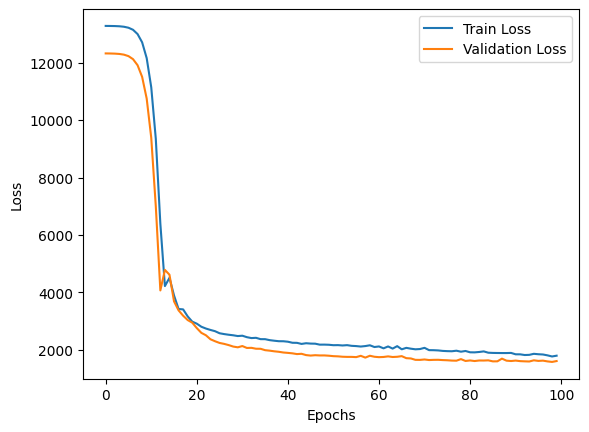

In [113]:
model= Sequential()

unit_nums= 100

model.add(Dense(unit_nums, input_dim= X_train1.shape[1], activation= 'relu'))
model.add(Dense(unit_nums, activation='relu'))
model.add(Dense(unit_nums, activation='relu'))
model.add(Dense(unit_nums, activation='relu'))
model.add(Dense(unit_nums, activation='relu'))
model.add(Dense(1, activation= 'linear'))

# Compile the model with Adam optimizer
model.compile(loss='mean_absolute_error',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model
history = model.fit(X_train1, y_train1, validation_data=(X_val, y_val), epochs=100, batch_size=32, callbacks=[early_stopping])

#adding loss to the dict 
loss_dict_for_layers[5]= history.history['loss'][-1]

# Plot learning curves
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/100
5/5 [==============================] - 0s 12ms/step - loss: 13277.8037 - mean_absolute_error: 13277.8037 - val_loss: 12320.4980 - val_mean_absolute_error: 12320.4980
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 13275.5732 - mean_absolute_error: 13275.5732 - val_loss: 12316.4297 - val_mean_absolute_error: 12316.4297
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 13268.7324 - mean_absolute_error: 13268.7324 - val_loss: 12304.2979 - val_mean_absolute_error: 12304.2979
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 13248.6855 - mean_absolute_error: 13248.6855 - val_loss: 12269.4023 - val_mean_absolute_error: 12269.4023
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 13191.6982 - mean_absolute_error: 13191.6982 - val_loss: 12170.9941 - val_mean_absolute_error: 12170.9941
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 13029.5557 - mean_absolute_error: 13029.555

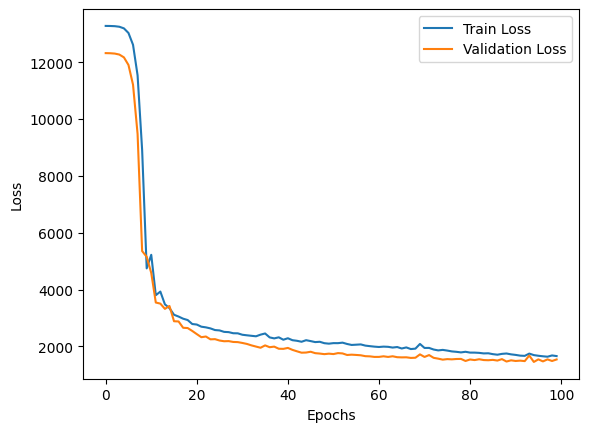

In [114]:
model= Sequential()

unit_nums= 100

model.add(Dense(unit_nums, input_dim= X_train1.shape[1], activation= 'relu'))
model.add(Dense(unit_nums, activation='relu'))
model.add(Dense(unit_nums, activation='relu'))
model.add(Dense(unit_nums, activation='relu'))
model.add(Dense(unit_nums, activation='relu'))
model.add(Dense(unit_nums, activation='relu'))
model.add(Dense(unit_nums, activation='relu'))
model.add(Dense(1, activation= 'linear'))

# Compile the model with Adam optimizer
model.compile(loss='mean_absolute_error',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model
history = model.fit(X_train1, y_train1, validation_data=(X_val, y_val), epochs=100, batch_size=32, callbacks=[early_stopping])

#adding loss to the dict 
loss_dict_for_layers[7]= history.history['loss'][-1]

# Plot learning curves
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the loss with different layers 

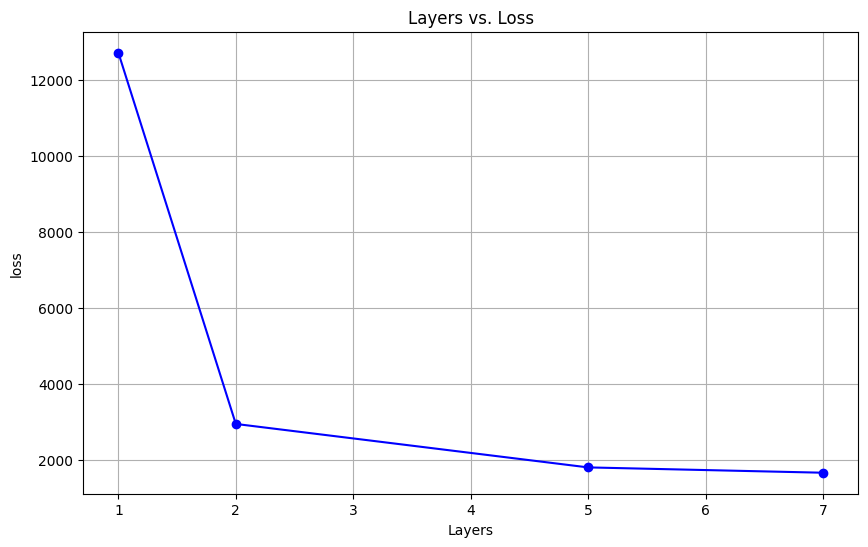

In [115]:
#Extracting keys and values:

x= list(loss_dict_for_layers.keys())
y= list(loss_dict_for_layers.values())

#plotting:

plt.figure(figsize=(10,6))
plt.plot(x,y,marker= 'o', linestyle= '-', color= 'b')
plt.title('Layers vs. Loss')
plt.xlabel('Layers')
plt.ylabel('loss')
plt.grid(True)
plt.show()